In [1]:
% matplotlib inline

from __future__ import division
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import time as tm
# import gsw as sw
from scipy.optimize import curve_fit
from scipy.stats import chi2

import numpy.ma as ma

from mpl_toolkits.basemap import Basemap, cm, shiftgrid
from netCDF4 import Dataset 

from matplotlib import rcParams, rc
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'sans-serif'})
rcParams.update({'font.sans-serif': 'TArisl'})
#rc('text', usetex=True)

In [2]:
# set data directory 
infile = r'../data/MV1405_coords.csv'

coords = pd.read_csv(infile, sep = ',')
coords['lon'] = coords['lon']*-1

# import CTD coordinate data
infile = r'../data/ctd_coords.csv'

ctd = pd.read_csv(infile, sep = ',')


In [3]:
# load the satellite NPP data

fname = '../data/satellite/A20141822014212.L3m_MO_CHL_chlor_a_4km.nc'
chl_data = Dataset(fname, mode='r')


chl = chl_data.variables['chlor_a']
lats = chl_data.variables['lat'][:]
lons = chl_data.variables['lon'][:]

lon, lat = np.meshgrid(lons, lats)

bad = (chl<0)
chla = np.ma.masked_where(bad, chl)

In [4]:
# import MDT data
infile = '../data/satellite/dt_global_allsat_msla_h_20140710_20150209.nc'
mdt_data = Dataset(infile, mode='r')

mdt_data.variables

mdt = np.squeeze(mdt_data.variables['sla'])
lats = mdt_data.variables['lat'][:]
lons = mdt_data.variables['lon'][:]

mdt,lons = shiftgrid(180.,mdt,lons,start=False)

lon_mdt, lat_mdt = np.meshgrid(lons, lats)

mdt[mdt<-3] = np.nan

/Users/sclayton/miniconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/sclayton/miniconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:
/Users/sclayton/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


Text(0,0.5,'Latitude')

/Users/sclayton/miniconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/sclayton/miniconda2/lib/python2.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


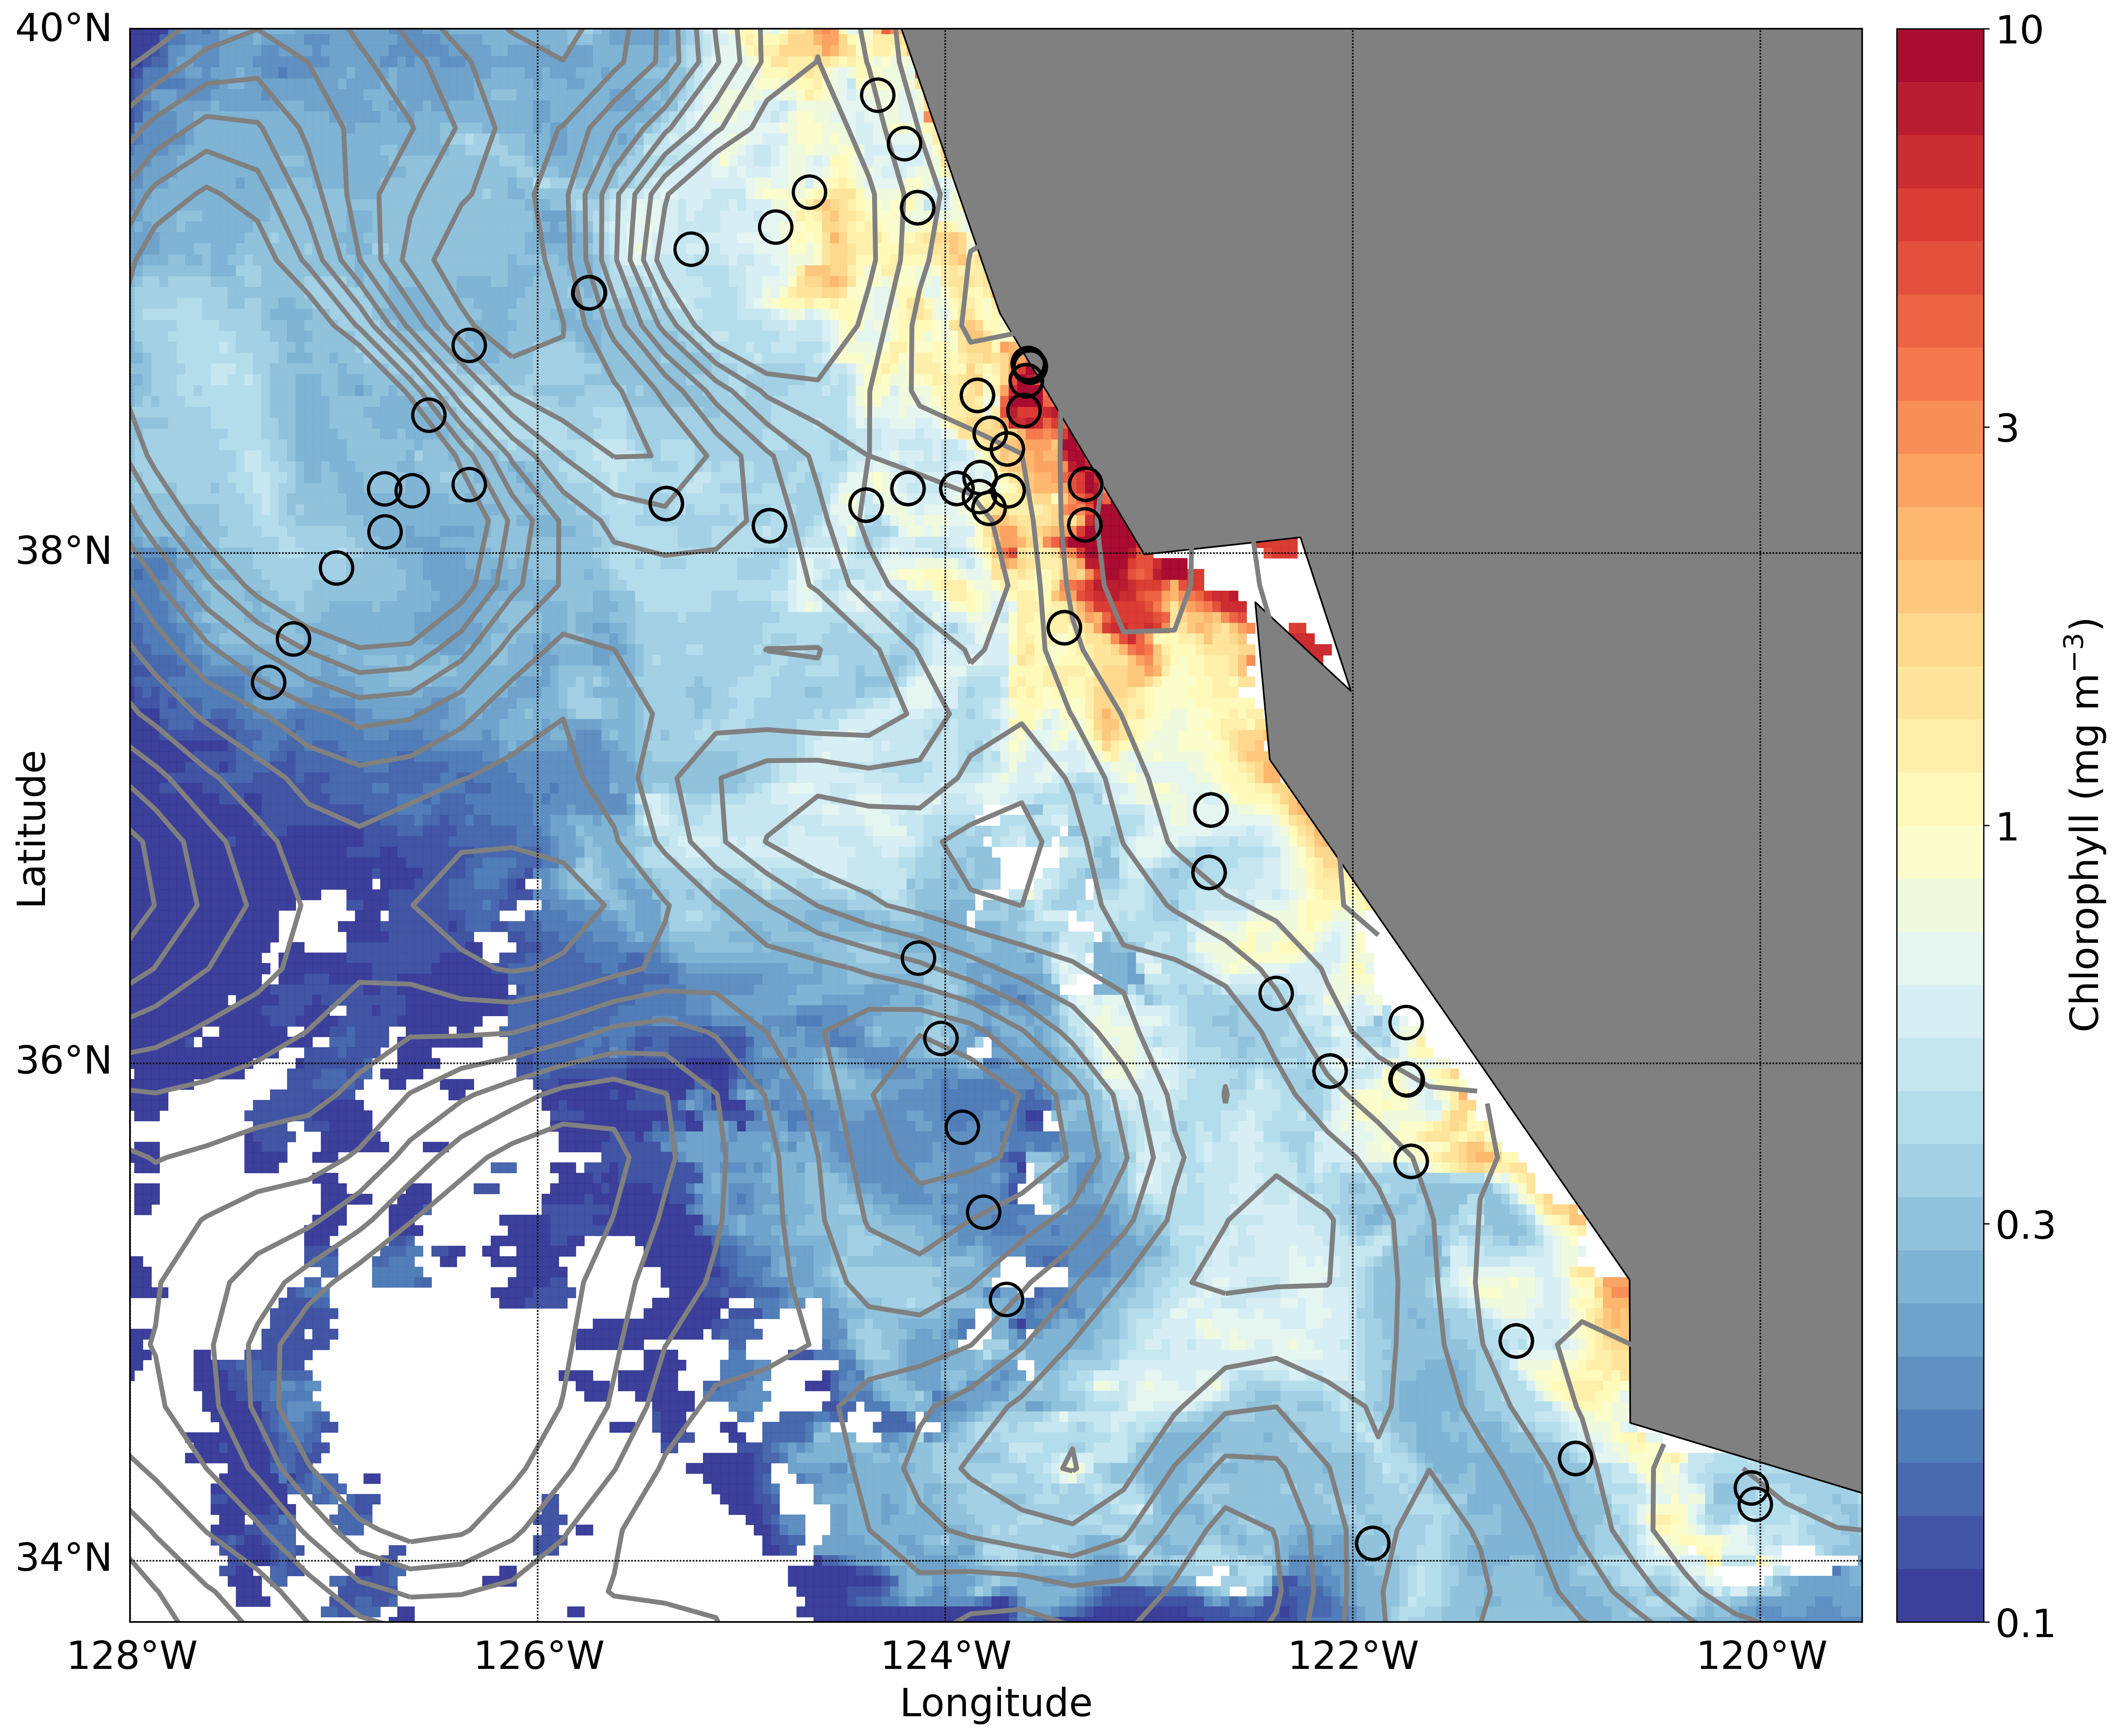

In [5]:
fig2,ax = plt.subplots(1, figsize=(20, 15), dpi = 300)
palette = plt.get_cmap('RdYlBu_r', 30)
m = Basemap(projection='merc',llcrnrlat=33.75,urcrnrlat=40.,\
            llcrnrlon=-128,urcrnrlon=-119.5,lat_ts=0,resolution='c')
m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='grey',lake_color='white')

xm, ym = m(coords['lon'].values, coords['lat'].values)
m.plot(xm,ym,'ok', markersize = 20, mfc='none', mew = 2)

xm, ym = m(ctd['longitude (W)'].values*-1, ctd['latitude (N)'].values)
m.plot(xm,ym,'ok', markersize = 20, mfc='none', mew = 2, zorder = 2)

xc, yc = m(lon, lat)
CS1 = m.pcolormesh(xc, yc, np.log10(chl), shading='flat',cmap = palette, vmin = -1 , vmax = 1, zorder = 1, alpha = 0.95)

xii, yii = m(lon_mdt, lat_mdt)
# mm = m.contourf(xii,yii,mdt, cmap = mcon, vmin = -0.5, vmax = 1.75, lw = 3, zorder = 0, alpha = 0.5)
# m.colorbar(mm)

m.contour(xii,yii,mdt,levels = np.arange(0, 10, 0.025), colors = 'grey', linewidths = 3, zorder = 2, alpha = 1)

m.drawparallels(np.arange(-50,80,2),labels=[1,0,0,0], fontsize=24)
m.drawmeridians(np.arange(-180,180,2),labels=[0,0,0,1], fontsize=24)

cbar = m.colorbar(CS1, ticks = [-1, -0.5, 0, 0.5, 1])
cbar.set_ticklabels([0.1, 0.3, 1, 3, 10])
cbar.set_label(r'Chlorophyll (mg m$^{-3}$)', fontsize = 24)
cbar.ax.tick_params(labelsize = 24)

plt.tick_params(axis='both', which='major', labelsize=24)
plt.tick_params(axis='both', which='minor', labelsize=24)
plt.xlabel('Longitude', fontsize = 24, labelpad = 40)
plt.ylabel('Latitude', fontsize = 24, labelpad = 50)

# fig2.savefig('../figures/cruise_map.png', dpi = 300)